In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVR

## Import Data

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Check dataset size

In [4]:
df.shape

(150, 5)

## Find and treat missing values (If any)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(147, 5)

In [9]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep = "\n")

sepal_length
[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]


sepal_width
[2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]


petal_length
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]


petal_width
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]


species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




## Check column types and describe which columns are numerical or categorical

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
#Separating categorical and numerical columns
cat=[]
num=[]

for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

In [12]:
cat

['species']

In [13]:
num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Perform Univariate analysis

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.corr()

C:\Users\zamam\AppData\Local\Temp\ipykernel_9416\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


C:\Users\zamam\AppData\Local\Temp\ipykernel_9416\3600714942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


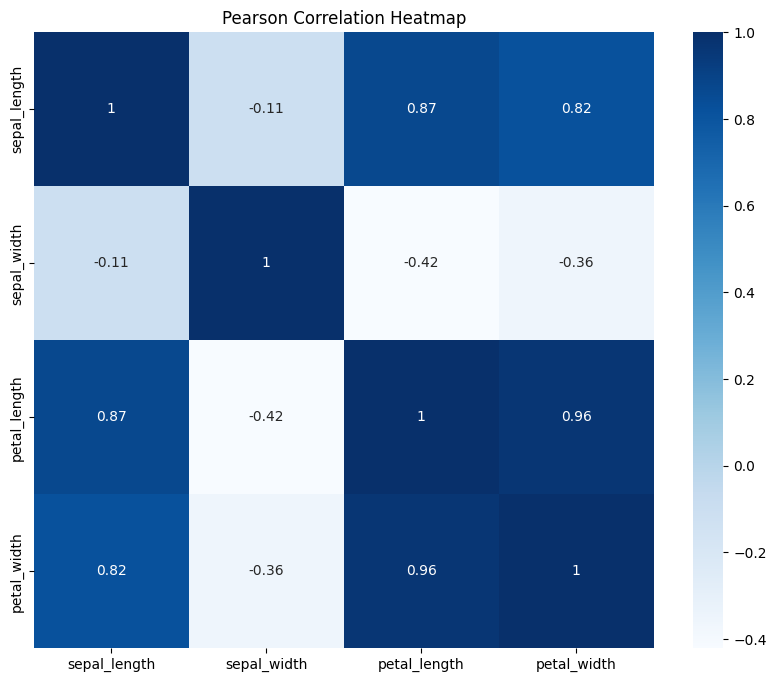

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [17]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

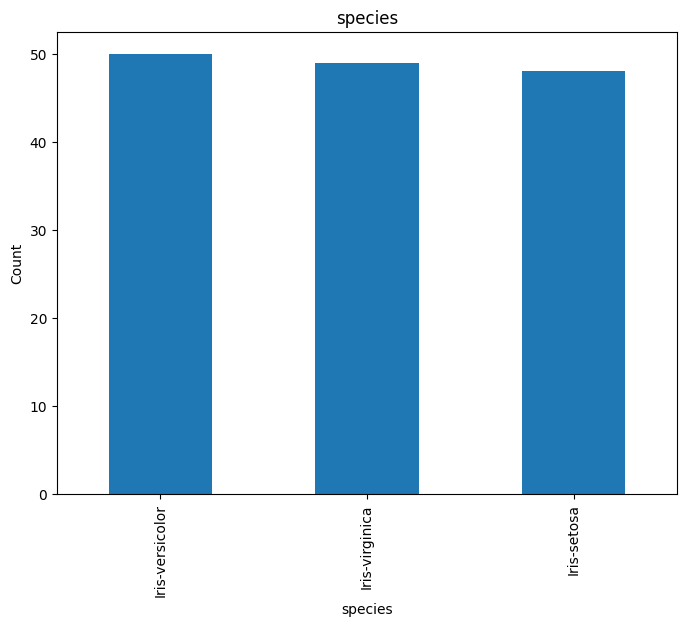

In [18]:
plt.figure(figsize=(8, 6))
df['species'].value_counts().plot(kind='bar')
plt.title('species')
plt.xlabel('species')
plt.ylabel('Count')
plt.show()

## Check the distribution of numerical variables

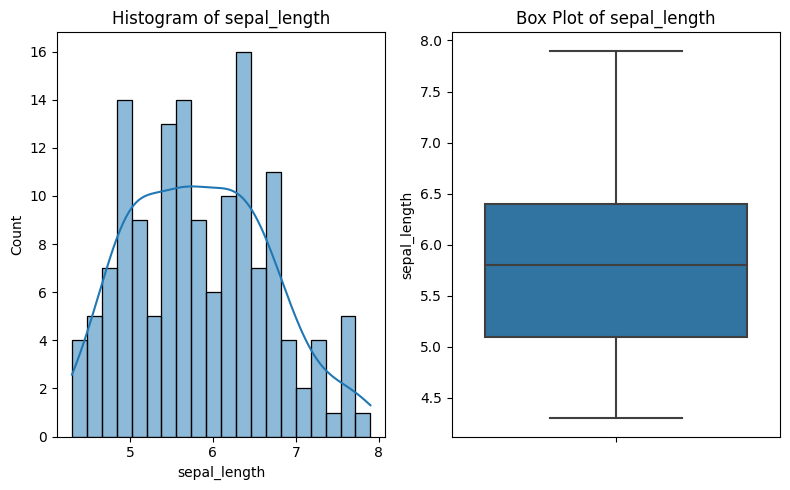

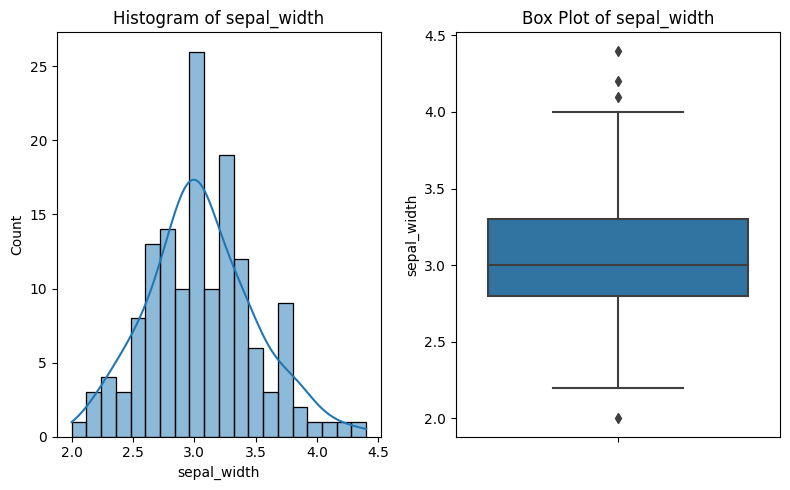

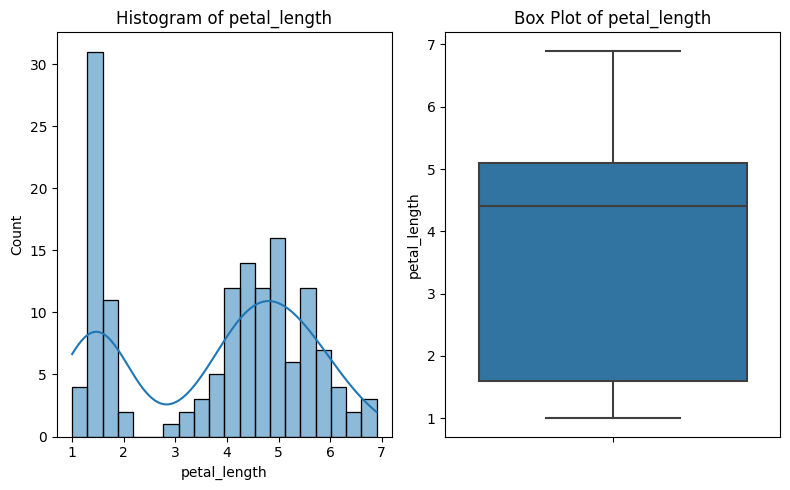

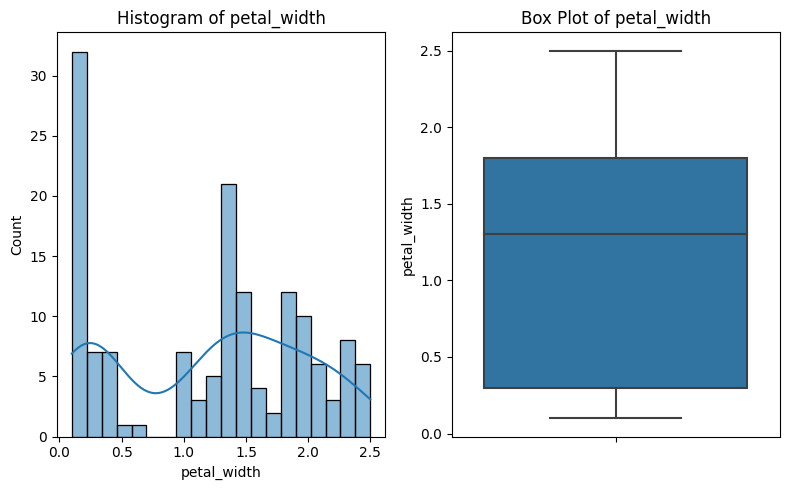

In [19]:
for column in num:
    plt.figure(figsize=(8, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

* After seeing the distributiopn of numerical columns we found that there are some outliers in the dataset, we have to perform outlier analysis in the data.

## Outlier Analysis

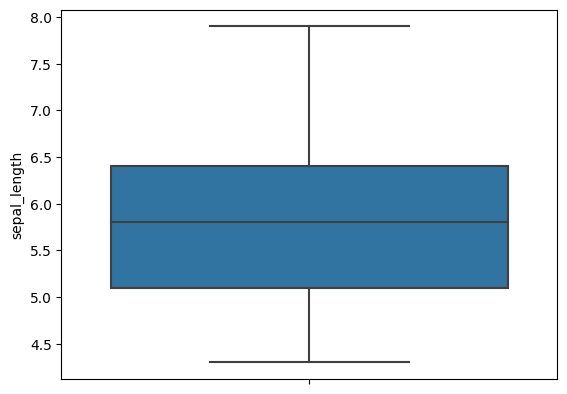

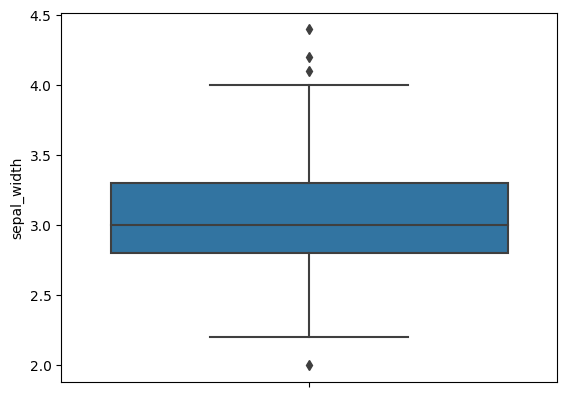

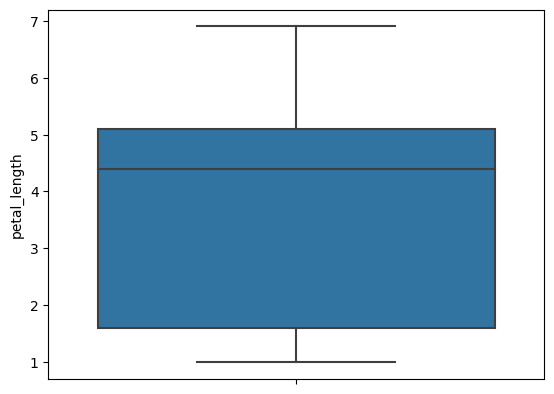

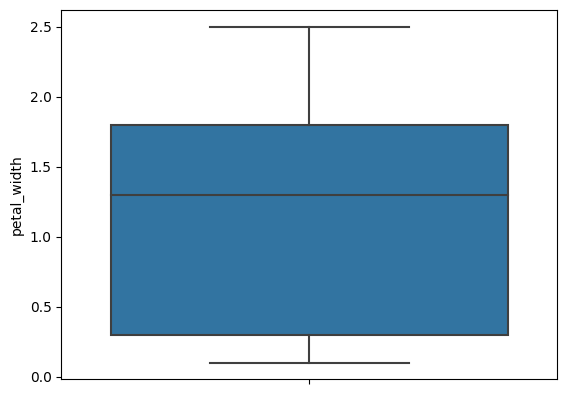

In [20]:
for i in num:
    plt.figure()
    sns.boxplot(data = df, y = i)

In [21]:
for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + (1.5*iqr)
    ll = q1 - (1.5*iqr)
    
    for j in df[i]:
        if j>ul:
            df[i] = df[i].replace(j, ul)
        elif j<ll:
            df[i] = df[i].replace(j, ll)

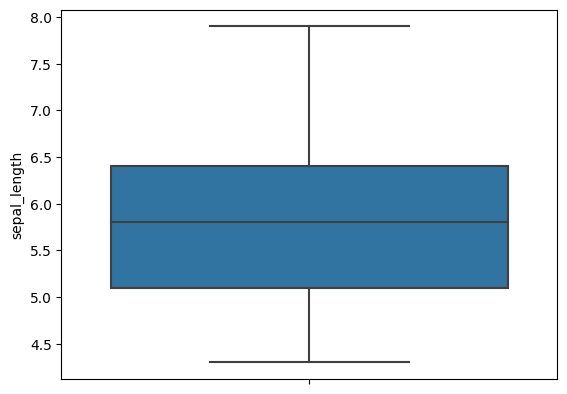

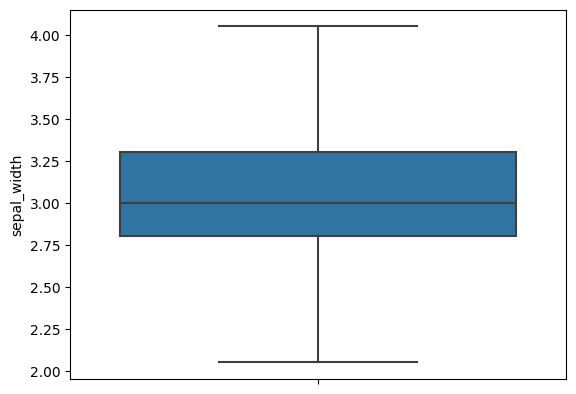

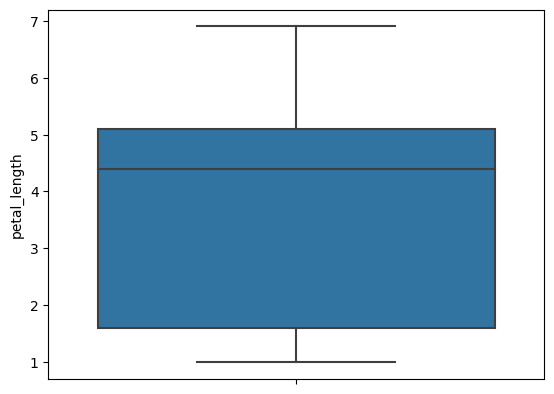

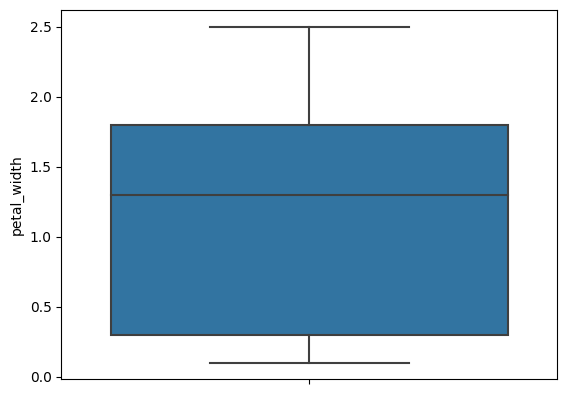

In [22]:
for i in num:
    plt.figure()
    sns.boxplot(data = df, y = i)

## Perform Bivariate analysis

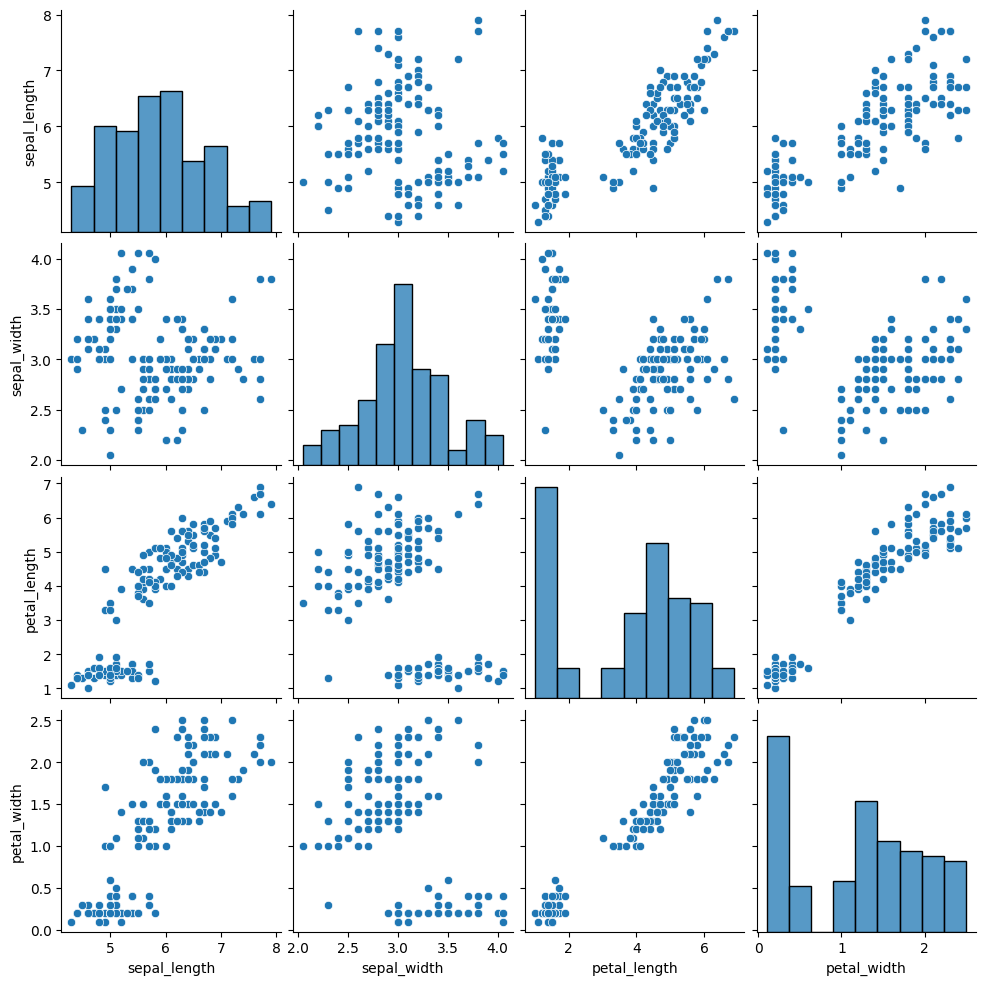

In [23]:
sns.pairplot(df)
plt.show()

# Split into train and test set

In [24]:
train, test = train_test_split(df, test_size=0.25)

In [25]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
...,...,...,...,...,...
66,5.6,3.0,4.5,1.5,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica


In [26]:
test

,sepal_length,sepal_width,petal_length,petal_width,species
71,6.1,2.80,4.0,1.3,Iris-versicolor
130,7.4,2.80,6.1,1.9,Iris-virginica
3,4.6,3.10,1.5,0.2,Iris-setosa
1,4.9,3.00,1.4,0.2,Iris-setosa
33,5.5,4.05,1.4,0.2,Iris-setosa
89,5.5,2.50,4.0,1.3,Iris-versicolor
43,5.0,3.50,1.6,0.6,Iris-setosa
5,5.4,3.90,1.7,0.4,Iris-setosa
81,5.5,2.40,3.7,1.0,Iris-versicolor
53,5.5,2.30,4.0,1.3,Iris-versicolor


In [27]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]

In [28]:
train_y = train.species

In [29]:
test_X = test[['sepal_length','sepal_width','petal_length','petal_width']]

In [30]:
test_y = test.species

### SVM

In [31]:
SVM = svm.SVC()

In [32]:
SVM.fit(train_X,train_y)
pred = SVM.predict(test_X)
print(pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [33]:
metrics.accuracy_score(pred, test_y)

0.9459459459459459

### Decision Tree

In [34]:
DT = DecisionTreeClassifier()

In [35]:
DT.fit(train_X,train_y)
pred = DT.predict(test_X)
print(pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [36]:
metrics.accuracy_score(pred, test_y)

0.918918918918919

### Random Forest

In [37]:
RF = RandomForestClassifier()

In [38]:
RF.fit(train_X,train_y)
pred = RF.predict(test_X)
print(pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [39]:
metrics.accuracy_score(pred, test_y)

0.918918918918919

## Label Encodeing

In [40]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [42]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [43]:
X = df[features]
y = df['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train, y_train)

C:\Users\zamam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 2, 2, 1, 1, 2, 1])

In [47]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

## Prediction on random data

In [49]:
predict = pd.DataFrame({
    'sepal_length': [4.7],
    'sepal_width': [2.4],
    'petal_length': [1.3],
    'petal_width': [0.3]})

predicted_species = lr.predict(predict)
print("Predicted Species:", predicted_species)

Predicted Species: [0]
